In [1]:
import numpy as np
import pandas as pd

import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme()

# Домашнее задание по курсу анализа данных
Версия от 12.10.2021

Всего 50 баллов = 40 основных + 10 дополнительных

**Оценка**  = (Количество баллов за работу*2 + 20)/10

**Мягкий дедлайн: 30.10.2021  23:59**

**Жесткий дедлайн: 6.11.2021  23:59**

Присылать решение ссылкой на ваш **github** в телеграмм **@Aleron75** или на почту **milenkin.aa@phystech.edu**

**Автор:** Миленькин Александр

In [3]:
df = pd.read_csv('people_data_clustering.csv', index_col=0)
print('Размеры',df.shape)
df.head()

Размеры (6000, 9)


,was_married,children,salary,sex,age,profession,home_cost,drive_info,happyness
id,,,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,Engineer,1.003674e+07,NaN,0.727499
1,1,2.0,1.737490e+08,1,32.0,Doctor,1.014051e+07,0.0,0.383234
2,1,6.0,2.489055e+08,1,14.0,Entertainment,1.043318e+07,NaN,0.432142
3,0,1.0,1.268718e+08,0,10.0,Lawyer,1.004299e+07,NaN,0.377987
4,1,9.0,8.596042e+07,1,99.0,Artist,1.021908e+07,NaN,0.657579


<div class="alert alert-info">
<b>Про Датасет</b>
    
Датасет представляет собой информацию по жителям некоторого города.

* `was_married` - Был ли когда-либо женат/замужем
* `childrens` - Количество детей
* `salary` - Уровень зарплаты
* `sex` - Пол
* `age` - Возраст
* `home_cost` - Стоимость жилья
* `Professon` - Профессия
* `drive_info` - Есть ли водительские права
    
</div>

<div class="alert alert-info">
<b>Задание</b>

Изучить датасет и, используя класстерный анализ, разбить пользователей на сегменты. Сделать выводы о причинах такой кластеризации.

# Изучение датасета (5 баллов)
* Какие признаки численные?
* Какие признаки категориальные?
* Какие признаки бинарные?
* Какие признаки имеют нормальное распределение?
* Какие признаки бессмысленные?

In [ ]:
"""
was_married - бинарный
childrens - численный
salary - численный
sex - бинарный :)
age - численный
home_cost - численный
Professon - категориальный
drive_info - бинарный 

home_cost - имеет нормальное распределение с выбросами
"""


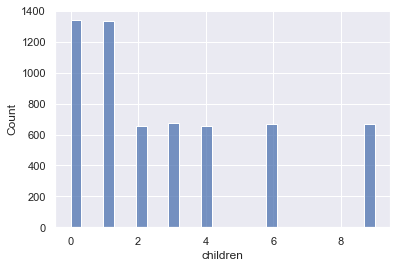

In [4]:
sns.histplot(df.children)

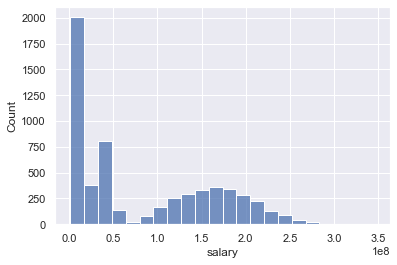

In [5]:
sns.histplot(df.salary)

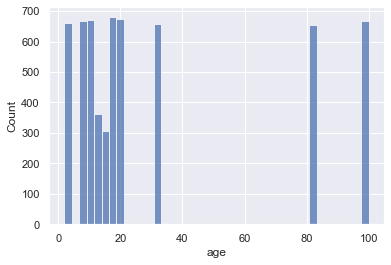

In [6]:
sns.histplot(df.age)

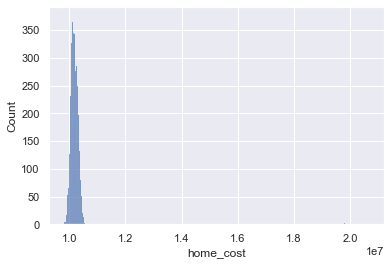

In [7]:
sns.histplot(df.home_cost) 

# Чистка датасета (5 баллов)
* Есть ли дубли в данных? 
* Есть ли пропуски в данных? 
* Как стоит поступить с выбросами? (удалить или заменить \ `dropna()` или `fillna()` )
* Удалить бесмысленные признаки (`drop()`)
* Найти и удалить выбросы по признаку `home_cost`. Сколько их?

In [9]:
sum(df.duplicated())  #дублей в данных нет

0

In [10]:
df.isnull().values.any() # есть пропуски

True

In [11]:
df.isnull().sum().sum()  # их слишком много(около 50 процентов от данных)

2770

In [12]:
df['drive_info'].isnull().sum().sum() # все содержатся в столбце drive_info

2770

In [13]:
df = df.drop('drive_info', axis = 1)  #я решил выкинуть столбец полностью, т.к. слишком много пропусков в нем

In [14]:
df.isnull().values.any()

False

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


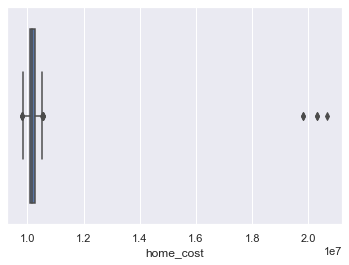

In [15]:
sns.boxplot(df.home_cost)  # выбросы хорошо видно на боксплоте

In [52]:
len(df[df.home_cost > 1.6 *10**7]) #видим 5 явных выбросов

5

In [16]:
df = df[df.home_cost < 1.6 *10**7]  # дропнем их

C:\Users\Lenovo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


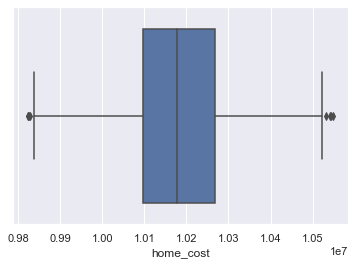

In [17]:
sns.boxplot(df.home_cost)

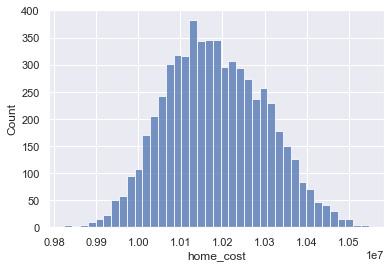

In [18]:
sns.histplot(df.home_cost)


# Изучение зависимых признаков (5 балла). 
* Построить матрицу корреляций
* Визуализировать матрицу корреляции с помощью heatmap
* Сделать выводы по самым скоррелированные признакам
* Построить график зависимости между двумя самыми зависимыми признаками



In [19]:
num_data = df.select_dtypes(include=['int', 'float', 'int64'])  #возьмем численные признаки для построения матрицы коррреляции
num_data.head()

,was_married,children,salary,sex,age,home_cost,happyness
id,,,,,,,
0,1,4.0,4.420530e+07,1,82.0,1.003674e+07,0.727499
1,1,2.0,1.737490e+08,1,32.0,1.014051e+07,0.383234
2,1,6.0,2.489055e+08,1,14.0,1.043318e+07,0.432142
3,0,1.0,1.268718e+08,0,10.0,1.004299e+07,0.377987
4,1,9.0,8.596042e+07,1,99.0,1.021908e+07,0.657579


In [20]:
corr_matrix = num_data.corr()  #самые скоррелированные пары (age, children) и (home_cost, salary)
corr_matrix 

,was_married,children,salary,sex,age,home_cost,happyness
was_married,1.000000,0.242498,-0.481980,0.337530,0.200835,-0.341256,0.252553
children,0.242498,1.000000,0.375516,0.389386,0.743025,0.286174,0.605916
salary,-0.481980,0.375516,1.000000,0.240089,0.073205,0.685847,0.200589
sex,0.337530,0.389386,0.240089,1.000000,0.341700,0.184011,0.470089
age,0.200835,0.743025,0.073205,0.341700,1.000000,0.053093,0.609307
home_cost,-0.341256,0.286174,0.685847,0.184011,0.053093,1.000000,0.153435
happyness,0.252553,0.605916,0.200589,0.470089,0.609307,0.153435,1.000000


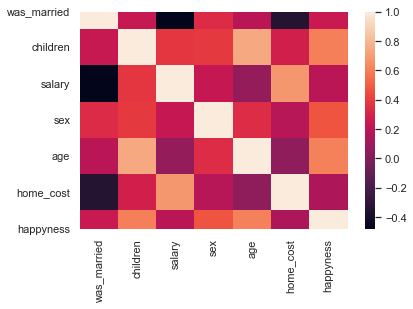

In [21]:
ax = sns.heatmap(corr_matrix)

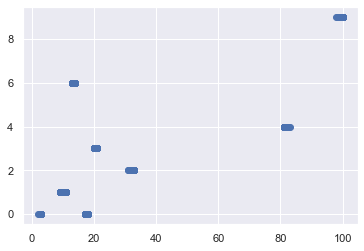

In [22]:
plt.scatter(df.age, df.children)

# Нормировка признаков (3 балла)
* Отнормировать данные
* Обосновать выбор нормировки

In [25]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
ss = StandardScaler()  #выбираю стандарт скейлер, так как он обычно лучше с моделями работает и мы почистили выбросы

df[['children','salary', 'age', 'home_cost', 'happyness']] = ss.fit_transform(df[['children','salary', 'age', 'home_cost', 'happyness']])
df.head()

,was_married,children,salary,sex,age,profession,home_cost,happyness
id,,,,,,,,
0,1,0.390008,-0.504605,1,1.542990,Engineer,-1.235713,1.738421
1,1,-0.311597,1.110127,1,0.006648,Doctor,-0.362021,-0.500731
2,1,1.091613,2.046936,1,-0.546435,Entertainment,2.102104,-0.182630
3,0,-0.662399,0.525814,0,-0.669343,Lawyer,-1.183165,-0.534858
4,1,2.144021,0.015863,1,2.065346,Artist,0.299485,1.283652


In [26]:
df = df.drop('profession', axis =1)

In [27]:
from tqdm import tqdm

# Выделить кластеры (6 баллов)
* Определить оптимальное количество кластеров с помощью правила локтя/осыпи
* Получить номера класстеров для каждого пользователя. 

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


range_n_clusters = np.array(range(2, 15))
arr_of_silhouette = np.array([])
arr_of_distances = np.array([])
for n_clusters in tqdm(range_n_clusters): #строим модели для разного количества кластеров

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    silhouette_avg = silhouette_score(df, cluster_labels)
    
    arr_of_silhouette = np.append(arr_of_silhouette, silhouette_avg)
    arr_of_distances = np.append(arr_of_distances, clusterer.inertia_) #сохраняем среднее расстояние в кластерах


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:11<00:00,  1.05s/it]


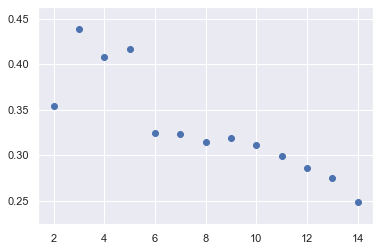

In [29]:
plt.scatter(range_n_clusters, arr_of_silhouette)

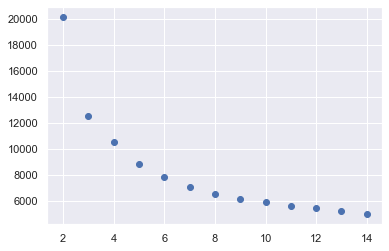

In [30]:
plt.scatter(range_n_clusters, arr_of_distances)  # по правилу локтя оптимальное количество кластеров - 10

In [47]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=10, random_state=42, max_iter=500)
cluster_labels = clusterer.fit_predict(df.drop(['happyness'], axis = 1))

# Снизить разерность (6 баллов)

Воспользуйтесь методом `t-SNE ()` (или `PCA`, `U-MAP`)

ссылка на документацию:
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [48]:
from sklearn.manifold import TSNE

data_x_y = TSNE(n_components=2, 
                 random_state=22, 
                 init='random').fit_transform(df.drop(['happyness'], axis = 1))

In [38]:
data_x_y

array([[ 55.051228, -51.83231 ],
       [-11.925   , -36.668003],
       [-76.80868 ,  33.63669 ],
       ...,
       [ 57.130787,  10.314169],
       [-25.94455 , -79.43014 ],
       [-28.103106,  70.531586]], dtype=float32)

In [49]:
data_x = data_x_y[:, 0]
data_y = data_x_y[:, 1]

# Нарисовать полученные кластеры (10 баллов)

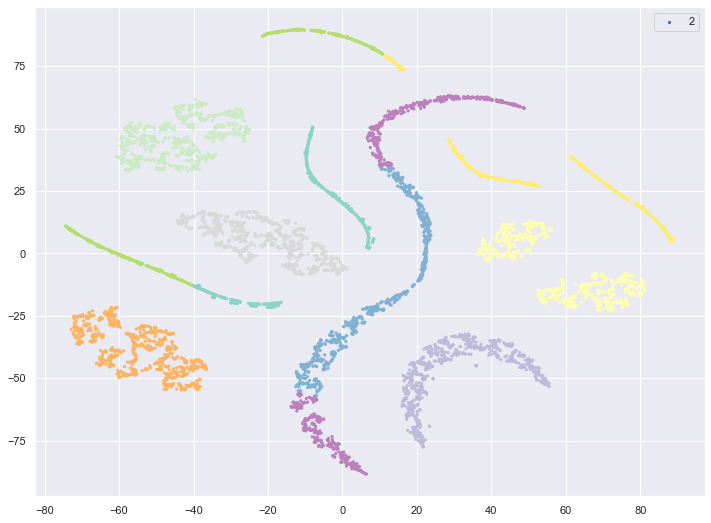

In [50]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,9))
plt.scatter(data_x, data_y, c=cluster_labels, cmap ='Set3', s=5)
#plt.scatter(data_x, data_y, c=y_blobs, s=1, cmap ='Set3')
plt.legend(cluster_labels)
plt.show()

# Дополнительные баллы (+10 баллов)
* Аккуратный и понятный код **+5 баллов**
* Присутствуют лаконичные и понятные комментарии **+5 балов**